<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/25_Finding_the_Nearest_Class_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Finding the Nearest Class Using KNN</b></div>



#

# *1. Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#

# *2. Import Dataset*

In [ ]:
df=pd.read_csv('K Nearest Neighbours/Tshirt_Sizing_Dataset.csv')
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


#

# *3. Data Analysis and Visualization*

In [ ]:
df.describe()

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


In [ ]:
df.isnull().sum()

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

<Axes: >

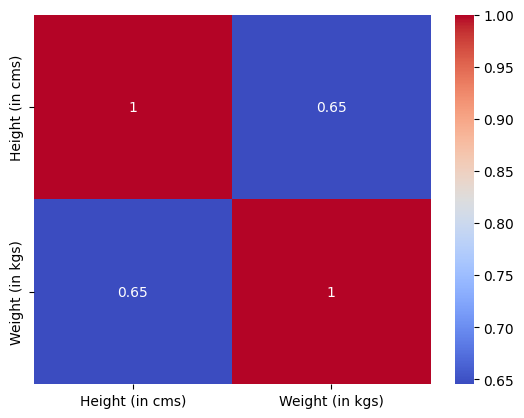

In [ ]:
corr_matrix = df.drop(['T Shirt Size'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Height (in cms)', ylabel='Weight (in kgs)'>

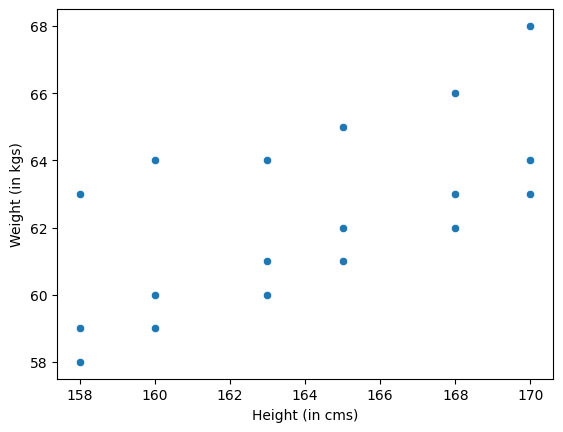

In [ ]:
sns.scatterplot(data=df, x='Height (in cms)', y='Weight (in kgs)')

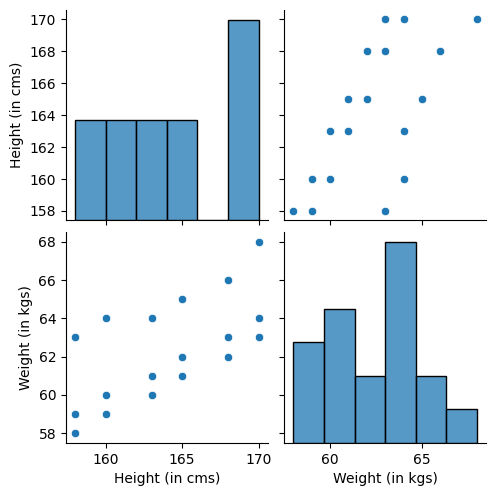

In [ ]:
sns.pairplot(df)

#

# *4. Splitting Data to Train and Test*

In [ ]:
X= df.iloc[:,0:2].values  # IT MUST BE ARRAY
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [ ]:
Y=df.iloc[:,2].values  # also  we need transform it to array
Y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(13, 2) (5, 2) (13,) (5,)


#

# *5. Model Training*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2) # this is for euclidian distance
classifier.fit(X_train,Y_train)


KNeighborsClassifier()

#

# *6. Model Evaluation and Visualization*

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 0, 0, 0])

<Axes: >

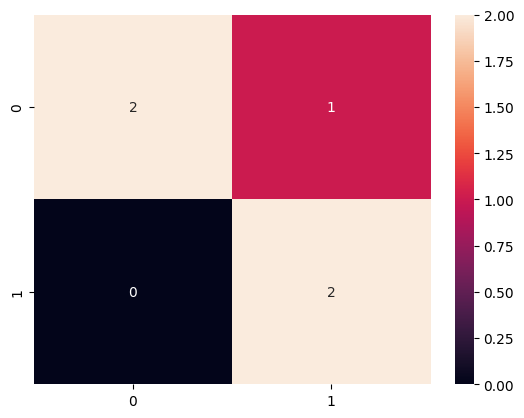

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm1,annot=True)

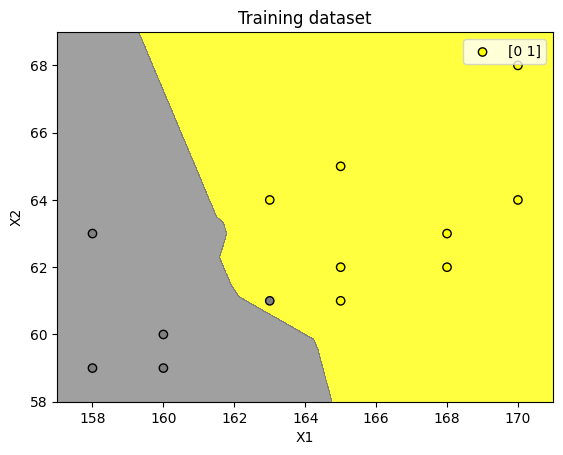

In [ ]:
X_grid, y_grid = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_grid[:, 0].min() - 1, stop=X_grid[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_grid[:, 1].min() - 1, stop=X_grid[:, 1].max() + 1, step=0.01))
colormap = ListedColormap(['#FFFF00', '#808080'])

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=colormap)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_grid[:, 0], X_grid[:, 1], c=y_grid, cmap=colormap, edgecolor='k', label=np.unique(y_grid))

plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()